# 상관관계
> 두 변수 간 '선형적 관계'가 있는지 분석

미세먼지 요인별 상관관게 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("2015_data.csv", encoding = "CP949") #데이터 로드

In [ ]:
data

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
0,강원,2015-01-01,0.006,0.623,0.019,0.012,73.621,10.937
1,강원,2015-01-02,0.008,0.871,0.017,0.018,40.302,14.740
2,강원,2015-01-03,0.008,1.050,0.013,0.024,47.844,25.083
3,강원,2015-01-04,0.011,1.371,0.010,0.029,63.758,42.063
4,강원,2015-01-05,0.011,1.567,0.009,0.031,93.979,64.552
...,...,...,...,...,...,...,...,...
5456,충북,2015-12-27,0.006,0.547,0.018,0.018,43.454,26.738
5457,충북,2015-12-28,0.005,0.568,0.012,0.025,36.038,21.360
5458,충북,2015-12-29,0.006,0.845,0.007,0.032,56.063,33.824
5459,충북,2015-12-30,0.006,0.862,0.006,0.031,64.832,42.903


In [ ]:
data_seoul = data[data.Location.isin(["서울"])] #지역이 "서울"인 데이터만 추출해 저장

In [ ]:
data_seoul.corr() #상관관계 분석

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.643323,-0.185885,0.642349,0.377125,0.602491
CO,0.643323,1.000000,-0.597343,0.832596,0.380044,0.732430
O3,-0.185885,-0.597343,1.000000,-0.523796,-0.065889,-0.123384
NO2,0.642349,0.832596,-0.523796,1.000000,0.295676,0.601958
PM10,0.377125,0.380044,-0.065889,0.295676,1.000000,0.671326
PM25,0.602491,0.732430,-0.123384,0.601958,0.671326,1.000000


In [ ]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


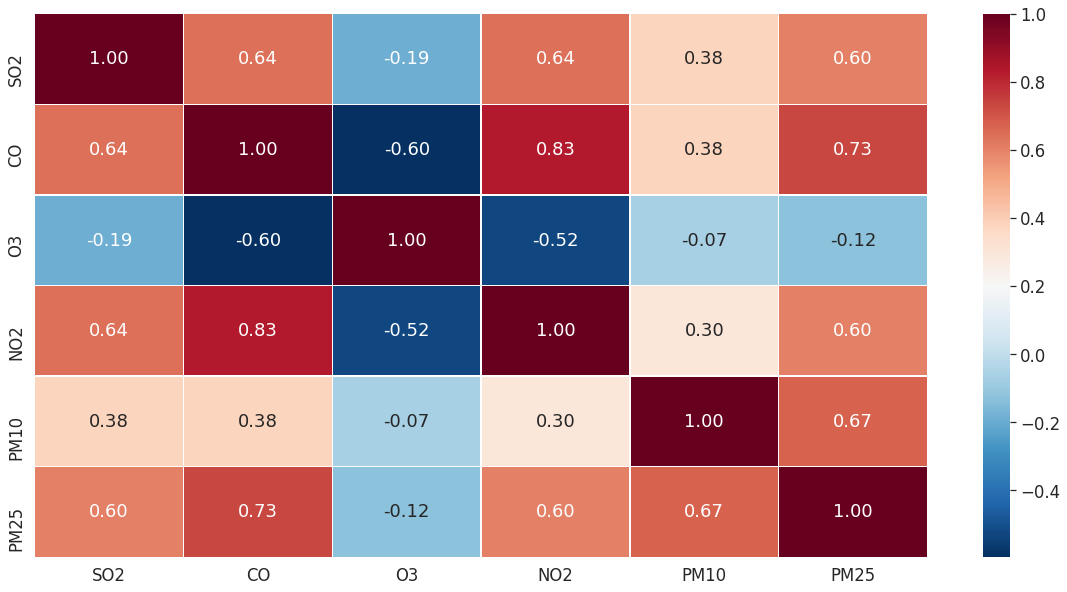

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (20, 10))

#변수 간 상관관계를 heatmap 으로 표현

#annot = True: 상관관계 시각화 시 각 변수를 표현
#fmt = ".2f": 소수점 두 번째 자리까지 출력
#linewidths = .5: 각 칸 사이의 간격을 0.5 로 지정
#cmap = "RdBu_r": 양의 상관일 때 붉은색, 음의 상관일 때 푸른색

sns_heatmap = sns.heatmap(data_seoul.corr(), annot = True, fmt = ".2f", linewidths = .5, cmap = "RdBu_r")

미세먼지와 기상 요인 간의 상관관계 분석

In [ ]:
#Raw Data(미세먼지, 기상) > Data Preprocessing > 계절별 분리 작업 > 상관관계 분석

In [ ]:
data = pd.read_csv("total_weather.csv", encoding = "CP949") #데이터 로드

In [ ]:
data_seoul = data[data.Location.isin(["서울"])] #지역이 "서울"인 데이터만 추출해 저장

In [ ]:
#각 계절별로 분류
date_dict = {
    "01" : "겨울", "02" : "겨울",
    "03" : "봄", "04" : "봄", "05" : "봄",
    "06" : "여름", "07" : "여름", "08" : "여름",
    "09" : "가을", "10" : "가을", "11" : "가을",
    "12" : "겨울"
}

data_seoul["Season"] = data_seoul.Date.str[5:7].map(date_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data_seoul = data_seoul[data_seoul.Season.isin(["겨울"])] #계절이 "겨울"인 데이터만 반환

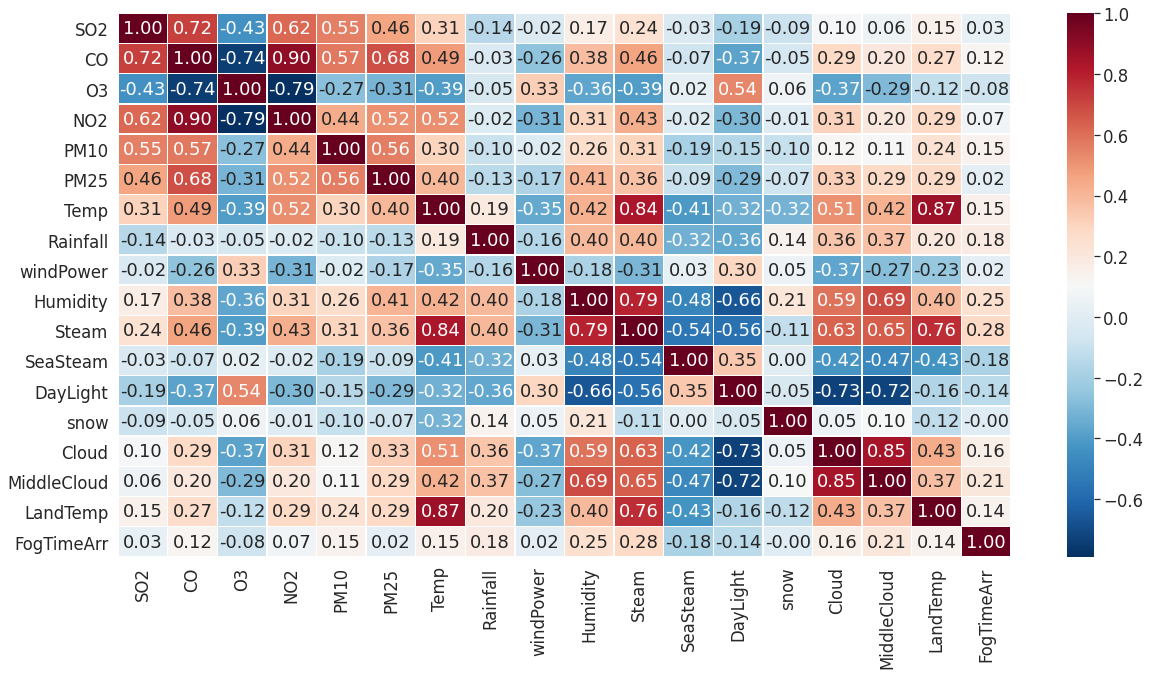

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize = (20, 10))
sns_heatmap = sns.heatmap(data_seoul.corr(), annot = True, fmt = ".2f", linewidths = .5, cmap = "RdBu_r")